In [1]:
import pandas as pd

In [4]:
#1
df = pd.read_excel("datasets/titanic.xls")

In [5]:
#2
df.shape

(1309, 14)

In [6]:
#3
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [7]:
#4
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
#5
df.tail(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [11]:
#6
df1 = df.loc[:,['pclass','survived','sex','age']]
df1.shape, df.shape

((1309, 4), (1309, 14))

In [12]:
#7
df1.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [ ]:
#On remarque qu'il y a des valeurs manquantes dans la colonne "age"

In [17]:
#9
df1[df1['age'].isna()]

,pclass,survived,sex,age
15,1,0,male,NaN
37,1,1,male,NaN
40,1,0,male,NaN
46,1,0,male,NaN
59,1,1,female,NaN
...,...,...,...,...
1293,3,0,male,NaN
1297,3,0,male,NaN
1302,3,0,male,NaN
1303,3,0,male,NaN


In [19]:
#10
df2 = df1.fillna(0)
df2

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1304,3,0,female,14.5000
1305,3,0,female,0.0000
1306,3,0,male,26.5000
1307,3,0,male,27.0000


In [21]:
#11
df2 = df1.fillna(df['age'].mean())
df2

,pclass,survived,sex,age
0,1,1,female,29.000000
1,1,1,male,0.916700
2,1,0,female,2.000000
3,1,0,male,30.000000
4,1,0,female,25.000000
...,...,...,...,...
1304,3,0,female,14.500000
1305,3,0,female,29.881135
1306,3,0,male,26.500000
1307,3,0,male,27.000000


In [23]:
#12
df3 = df1.dropna()


((1309, 4), (1309, 4), (1046, 4))

In [24]:
#13
df3.shape

(1046, 4)

In [25]:
#14
df3.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [28]:
#15
df1.groupby(['pclass']).count()

,survived,sex,age
pclass,,,
1,323,323,284
2,277,277,261
3,709,709,501


In [32]:
#15
df1['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

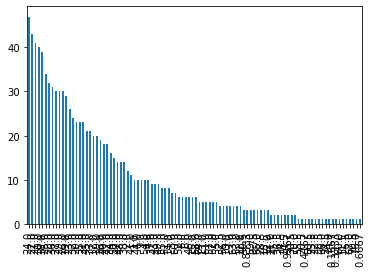

In [37]:
#16
df1['age'].value_counts().plot.bar()

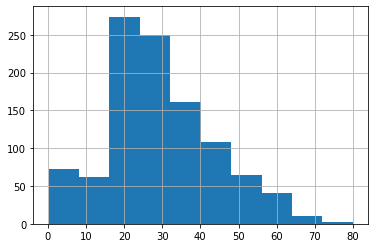

In [36]:
#17
df1['age'].hist()

In [38]:
#18
df1.groupby(['sex']).mean()
#Moyenne age : 28.68 pour les femmes et 30.58 pour les hommes 
#Le pourcentage de survivants : 72% pour les femmes et 19%pour les hommes

,pclass,survived,age
sex,,,
female,2.154506,0.727468,28.687071
male,2.372479,0.190985,30.585233


In [39]:
#19
df1.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.965278  37.037594
       2       0.886792  27.499191
       3       0.490741  22.185307
male   1       0.340782  41.029250
       2       0.146199  30.815401
       3       0.152130  25.962273

In [44]:
#20
df4 = df.set_index('name')
df4

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
"Zabour, Miss. Thamine",3,0,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN


In [46]:
df1[df1['age']<=18]

,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
11,1,1,female,18.0000
53,1,0,male,17.0000
54,1,1,male,11.0000
...,...,...,...,...
1275,3,0,male,16.0000
1279,3,0,female,14.0000
1288,3,0,male,18.0000
1300,3,1,female,15.0000


In [47]:
df1[df1['age']<=18].groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.923077  15.615385
       2       0.952381   9.662700
       3       0.534483  10.399426
male   1       0.750000  10.864587
       2       0.523810   9.587300
       3       0.208333  11.199074